# DDoS attacks detection and characterization

First, we need to import the necessary libraries.

In [35]:
# import needed python libraries

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

## Supervised learning - classification
Now we load the transformed dataset from the csv we created in the previous jupyter notebook.

In [51]:
# Load the dataset
df = pd.read_csv("pca_dataset.csv", header=0, index_col=0, engine='python')

df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,label
0,-0.284227,-1.031528,-0.847474,-0.174401,-0.867714,2.738893,-1.021160,0.572375,-0.200909,-0.113964,...,-0.016240,0.004520,-0.007726,-0.000549,-0.003569,0.017081,-0.043824,-0.007183,0.000671,ddos_dns
1,-0.334613,-0.665187,-0.962476,0.405087,0.461767,0.124486,0.106917,-0.091467,-0.061478,0.092113,...,0.047349,-0.064328,0.045066,0.027939,0.008969,-0.026256,0.016200,0.037482,0.021847,ddos_dns
2,-0.307742,-1.144423,-0.991048,-0.167760,-1.485189,4.775312,-1.786339,1.240988,-0.564195,-0.127972,...,-0.013193,0.007981,0.001997,0.018305,-0.012399,0.012201,-0.025050,-0.007868,0.007056,ddos_dns
3,-0.307909,-1.144464,-0.991139,-0.167737,-1.485196,4.775309,-1.786288,1.240995,-0.564174,-0.127970,...,-0.013447,0.007836,0.002022,0.018268,-0.012515,0.012159,-0.025048,-0.007888,0.007066,ddos_dns
4,-0.309101,-1.144294,-0.990969,-0.167914,-1.485369,4.773705,-1.784758,1.241510,-0.564316,-0.128338,...,-0.013766,0.007661,0.002087,0.018267,-0.012464,0.012106,-0.025024,-0.007791,0.007097,ddos_dns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64234,-0.771804,-0.805534,-0.358899,-0.476012,-0.524117,-0.706794,1.034228,0.430967,-0.026979,-0.522731,...,-0.009887,0.013770,-0.002440,0.007576,0.001982,0.001835,-0.005733,-0.004297,0.001123,ddos_udp_lag
64235,0.001752,-0.993832,-1.015435,-0.196162,-0.371376,0.959232,-0.221572,0.026344,0.086233,0.215038,...,0.036509,-0.037440,0.007034,-0.013158,0.003226,-0.024392,0.063594,0.018227,-0.013548,ddos_udp_lag
64236,-0.771804,-0.805534,-0.358899,-0.476012,-0.524117,-0.706794,1.034228,0.430967,-0.026979,-0.522731,...,-0.009887,0.013770,-0.002440,0.007576,0.001982,0.001835,-0.005733,-0.004297,0.001123,ddos_udp_lag
64237,-0.022837,-0.974232,-0.985986,-0.190383,-0.352925,0.924495,-0.218127,0.009171,0.093423,0.208569,...,0.037133,-0.034376,0.004909,-0.013977,0.000990,-0.022780,0.067008,0.013820,-0.007303,ddos_udp_lag


We decided to use the following algorithms to perform supervised learning:
- K-NN
- multi-class logistic regression (one-vs-rest scheme)
- random forest

Then, we proceed analyzing their performances using the default parameters.

In [52]:
X = df.drop(columns=['label']).to_numpy()
y = df[['label']].to_numpy()

# run stratified training-test splitting using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=15)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

In [38]:
# k-NN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_train_pred_knn = knn_clf.predict(X_train)
y_test_pred_knn = knn_clf.predict(X_test)

# LR
lr_clf = LogisticRegression(max_iter=100)
lr_clf.fit(X_train, y_train)
y_train_pred_lr = lr_clf.predict(X_train)
y_test_pred_lr = lr_clf.predict(X_test)

# RF
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_train_pred_rf = rf_clf.predict(X_train)
y_test_pred_rf = rf_clf.predict(X_test)

/Users/chiara/.venvs/ml4n/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# k-NN
print("k-NN")
# classification report
print('Training set')
print(classification_report(y_train, y_train_pred_knn))
print('Test set')
print(classification_report(y_test, y_test_pred_knn))

# LR
print("LOGISTIC REGRESSION")
# classification report
print('Training set')
print(classification_report(y_train, y_train_pred_lr))
print('Test set')
print(classification_report(y_test, y_test_pred_lr))

# RF
print("RANDOM FOREST")
# classification report
print('Training set')
print(classification_report(y_train, y_train_pred_rf))
print('Test set')
print(classification_report(y_test, y_test_pred_rf))

k-NN
Training set
              precision    recall  f1-score   support

      benign       0.99      0.99      0.99      3961
    ddos_dns       0.99      0.84      0.91      3758
   ddos_ldap       0.50      0.67      0.57      4149
  ddos_mssql       0.54      0.13      0.21      4138
ddos_netbios       0.97      0.96      0.97      4081
    ddos_ntp       0.88      0.94      0.91       690
   ddos_snmp       1.00      1.00      1.00      4189
   ddos_ssdp       0.61      0.94      0.74      4179
    ddos_syn       0.60      0.89      0.72      3836
   ddos_tftp       0.77      0.37      0.50      3683
    ddos_udp       0.68      0.40      0.50      4113
ddos_udp_lag       0.58      0.82      0.68      4190

    accuracy                           0.73     44967
   macro avg       0.76      0.75      0.72     44967
weighted avg       0.75      0.73      0.71     44967

Test set
              precision    recall  f1-score   support

      benign       0.99      0.98      0.98      16

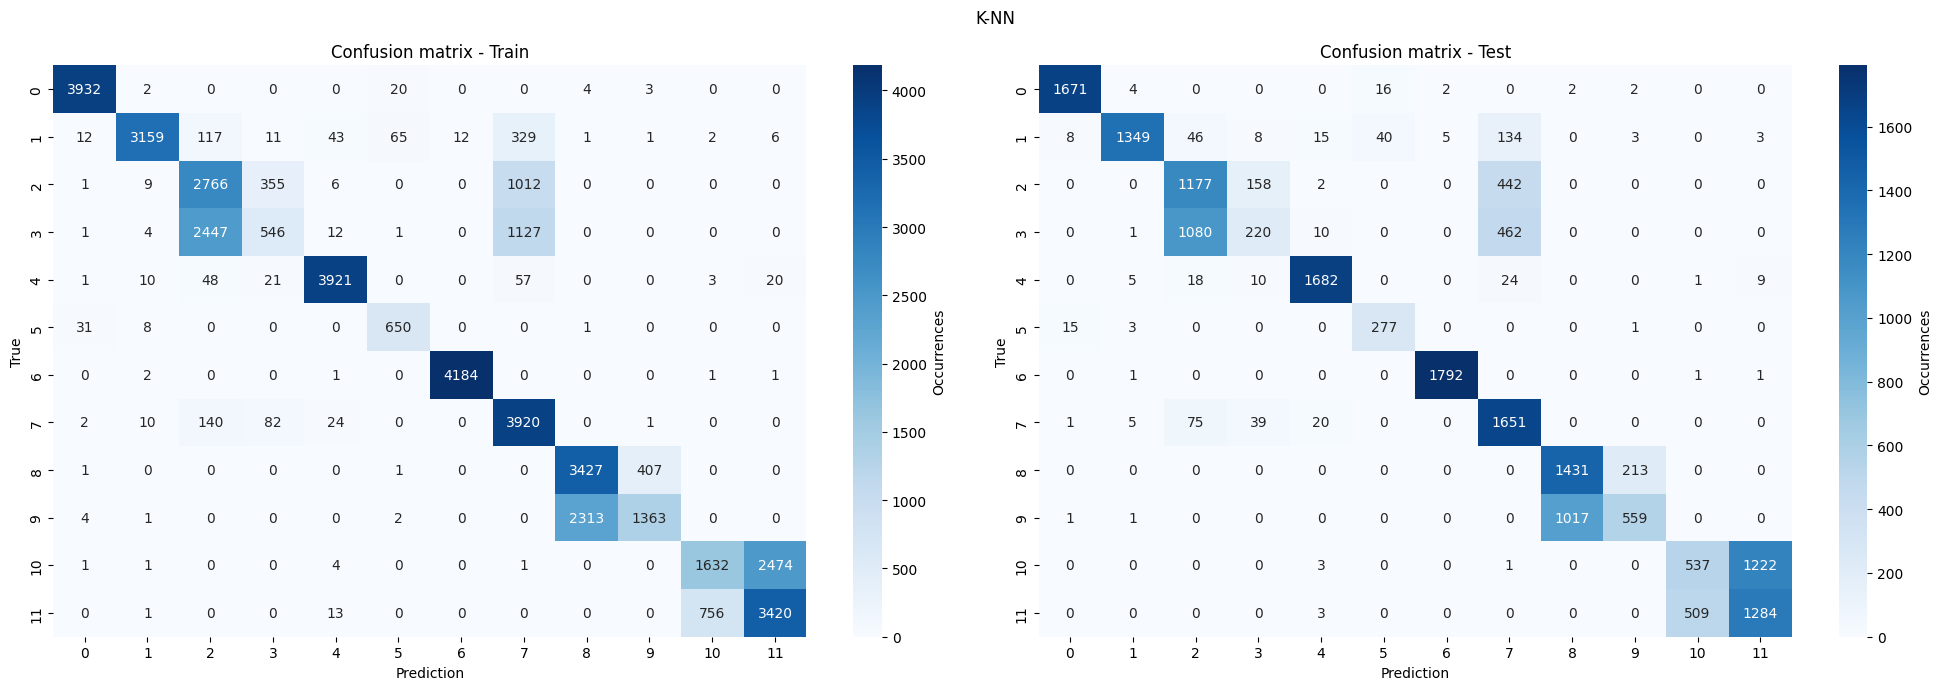

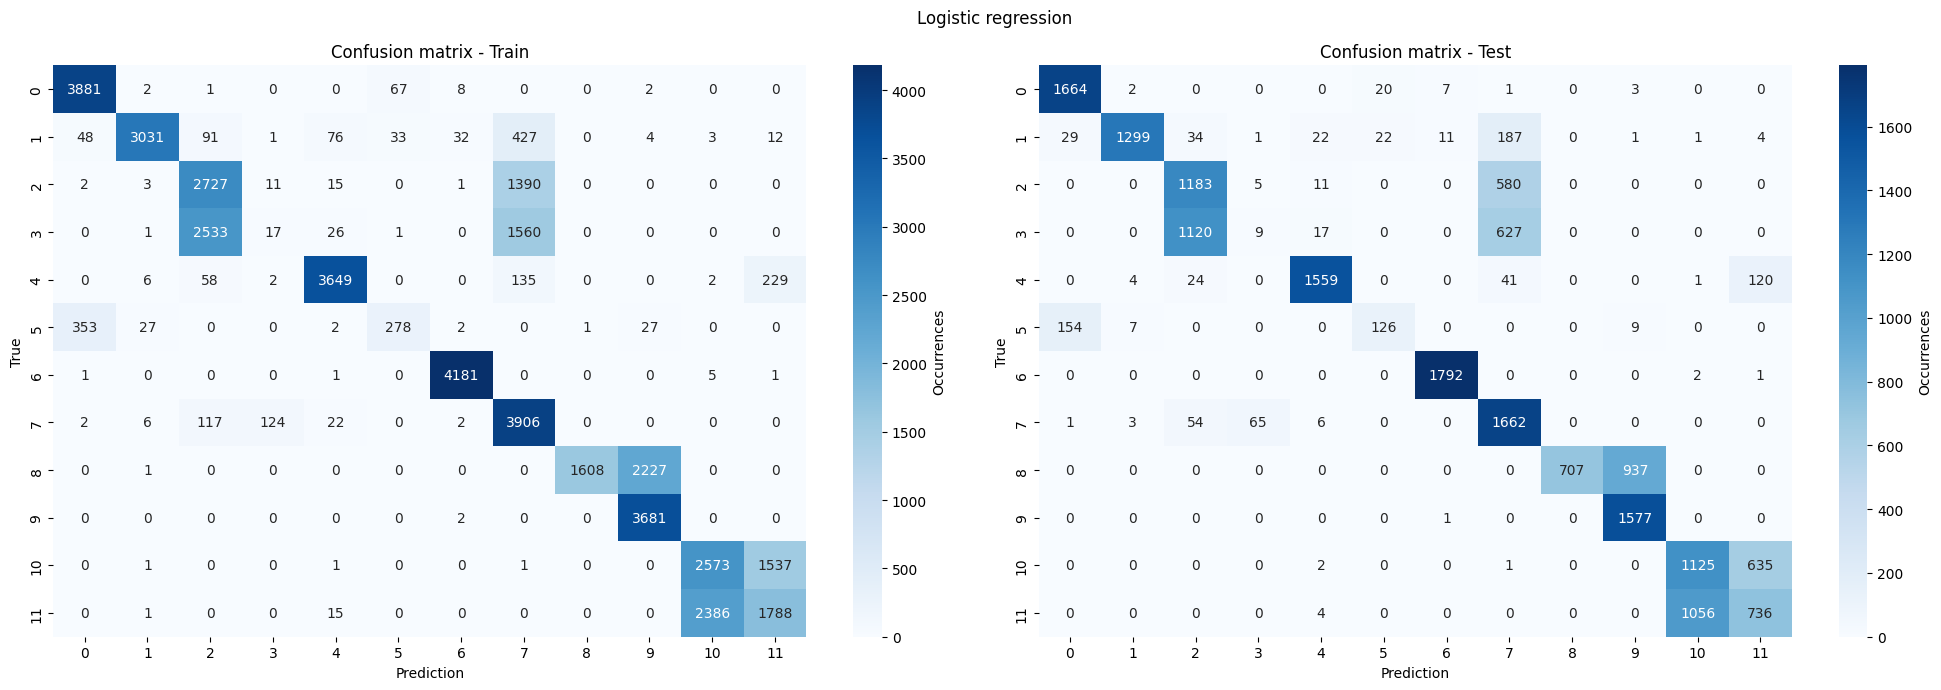

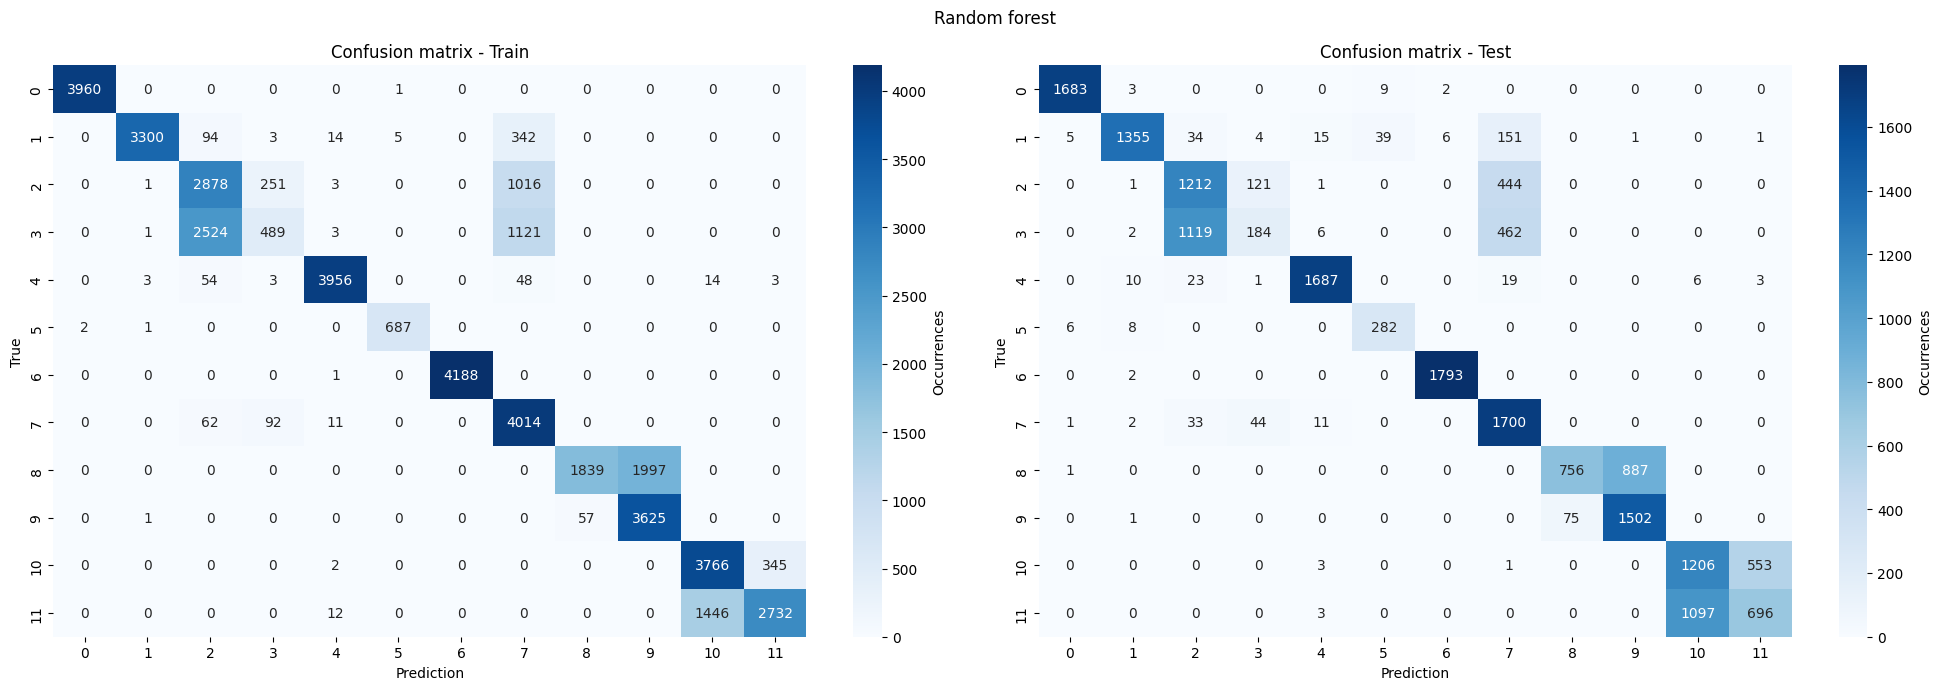

In [40]:
# K-NN
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

confusion_train = confusion_matrix(y_train, y_train_pred_knn)
sns.heatmap(confusion_train, cmap='Blues', annot=True, ax=ax1, cbar_kws={'label':'Occurrences'}, fmt='d')
ax1.set_xlabel('Prediction')
ax1.set_ylabel('True')
ax1.set_title('Confusion matrix - Train')

confusion_test = confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(confusion_test, cmap='Blues', annot=True, ax=ax2, cbar_kws={'label':'Occurrences'}, fmt='d')
ax2.set_xlabel('Prediction')
ax2.set_ylabel('True')
ax2.set_title('Confusion matrix - Test')
fig.suptitle("K-NN")

plt.tight_layout()
plt.show()

# LR
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

confusion_train = confusion_matrix(y_train, y_train_pred_lr)
sns.heatmap(confusion_train, cmap='Blues', annot=True, ax=ax1, cbar_kws={'label':'Occurrences'}, fmt='d')
ax1.set_xlabel('Prediction')
ax1.set_ylabel('True')
ax1.set_title('Confusion matrix - Train')

confusion_test = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(confusion_test, cmap='Blues', annot=True, ax=ax2, cbar_kws={'label':'Occurrences'}, fmt='d')
ax2.set_xlabel('Prediction')
ax2.set_ylabel('True')
ax2.set_title('Confusion matrix - Test')
fig.suptitle("Logistic regression")

plt.tight_layout()
plt.show()

# RF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

confusion_train = confusion_matrix(y_train, y_train_pred_rf)
sns.heatmap(confusion_train, cmap='Blues', annot=True, ax=ax1, cbar_kws={'label':'Occurrences'}, fmt='d')
ax1.set_xlabel('Prediction')
ax1.set_ylabel('True')
ax1.set_title('Confusion matrix - Train')

confusion_test = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(confusion_test, cmap='Blues', annot=True, ax=ax2, cbar_kws={'label':'Occurrences'}, fmt='d')
ax2.set_xlabel('Prediction')
ax2.set_ylabel('True')
ax2.set_title('Confusion matrix - Test')
fig.suptitle("Random forest")

plt.tight_layout()
plt.show()

We noticed that:
- K-NN confuses classes ddos_ldap and ddos_mssql (2 and 3), ddos_syn and ddos_tftp (8 and 9), ddos_udp and ddos_udp_lag (10 and 11); 
- LR miscassifies the samples of the class ddos_mssql (very poor performances of trainig and test set), tends to classify as ddos_tftp ddos_syn samples (but not viceversa), it confuses ddos_udp and ddos_udp_lag (10 and 11)
- RF confuses classes ddos_ldap and ddos_mssql (similar to k-NN), tends to classify as ddos_tftp ddos_syn samples (but not viceversa as LR), ddos_udp and ddos_udp_lag (but it tends to misclassify ddos_udp as ddos_udp_lag less then the other models); 
- all three models tends to assign samples of classes ddos_dns, ddos_ldap and ddos_mssql (1-3) to class ddos_ssdp (7), while viceversa is less common.
- since we never have super great performances on the train we don't think there's overfitting. Maybe there's underfitting, but we cannot see bad performances on the classification of all train groups, it depends on the label.

### Hyper-parameter tuning
V. lab 8